© Copyright 2022, Mohamed Ibrahim Mohamed
All rights reserved.

# Week 7
## RandomForest In Class Practice

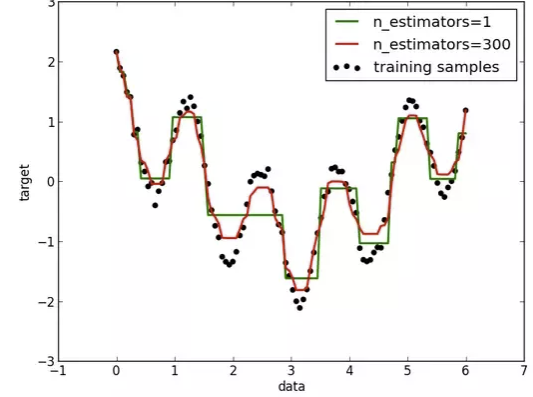


### Predict max daily temperature based on temperature predictions from other sources

##### How can temperatures from different sources be used to accurately predict the temperature of a day?

In [9]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plots
import seaborn as sns ## generates enhanced plots
from math import sqrt
import math                                               # basic calculations like square root
import os                                                 # to set current working directory 
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                            # for accessing tree information
from sklearn import metrics                               # measures to check our models
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score       # cross validation methods
from sklearn.tree import export_graphviz                  # graphical visualization of trees
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
from subprocess import check_call
# Read in data and display first 5 rows
features = pd.read_csv('Lecture7_temps.csv')
features.head(5)

## predict actual

year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41

Perform the necessary EDA for the data
- Dimension 
- Info
- Descriptive Statistics Summary 
- ...etc

In [10]:
#displays the data information
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [11]:
#dispalys the data statistics
features.describe()

year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179  
min     35.000000      41.000000     46.000000       44.000000   28.000000  
25%     54.000000      48.000000     53.000000       50.000000   47.750000  
50%     62.500000      56.000000     61.000000       58.000000   60.000000  
75%     71.000000      66.000000     72.000000       69.000000   71.000000  
max     92.000000      77.000000     82.000000       79.000000   95.000000

In [12]:
matrix = features.corr()
matrix

year     month       day    temp_2    temp_1   average  \
year             NaN       NaN       NaN       NaN       NaN       NaN   
month            NaN  1.000000 -0.000412  0.047651  0.032664  0.120806   
day              NaN -0.000412  1.000000 -0.046194 -0.000691 -0.021136   
temp_2           NaN  0.047651 -0.046194  1.000000  0.857800  0.821560   
temp_1           NaN  0.032664 -0.000691  0.857800  1.000000  0.819328   
average          NaN  0.120806 -0.021136  0.821560  0.819328  1.000000   
actual           NaN  0.004529 -0.021675  0.805835  0.877880  0.848365   
forecast_noaa    NaN  0.131141 -0.021393  0.813134  0.810672  0.990340   
forecast_acc     NaN  0.127436 -0.030605  0.817374  0.815162  0.990705   
forecast_under   NaN  0.119786 -0.013727  0.819576  0.815943  0.994373   
friend           NaN  0.048145  0.024592  0.583758  0.541282  0.689278   

                  actual  forecast_noaa  forecast_acc  forecast_under  \
year                 NaN            NaN           NaN             NaN   
month           0.004529       0.131141      0.127436        0.119786   
day            -0.021675      -0.021393     -0.030605       -0.013727   
temp_2          0.805835       0.813134      0.817374        0.819576   
temp_1          0.877880       0.810672      0.815162        0.815943   
average         0.848365       0.990340      0.990705        0.994373   
actual          1.000000       0.838639      0.842135        0.838946   
forecast_noaa   0.838639       1.000000      0.979863        0.985670   
forecast_acc    0.842135       0.979863      1.000000        0.983910   
forecast_under  0.838946       0.985670      0.983910        1.000000   
friend          0.569145       0.669221      0.696054        0.691177   

                  friend  
year                 NaN  
month           0.048145  
day             0.024592  
temp_2          0.583758  
temp_1          0.541282  
average         0.689278  
actual          0.569145  
forecast_noaa   0.669221  
forecast_acc    0.696054  
forecast_under  0.691177  
friend          1.000000

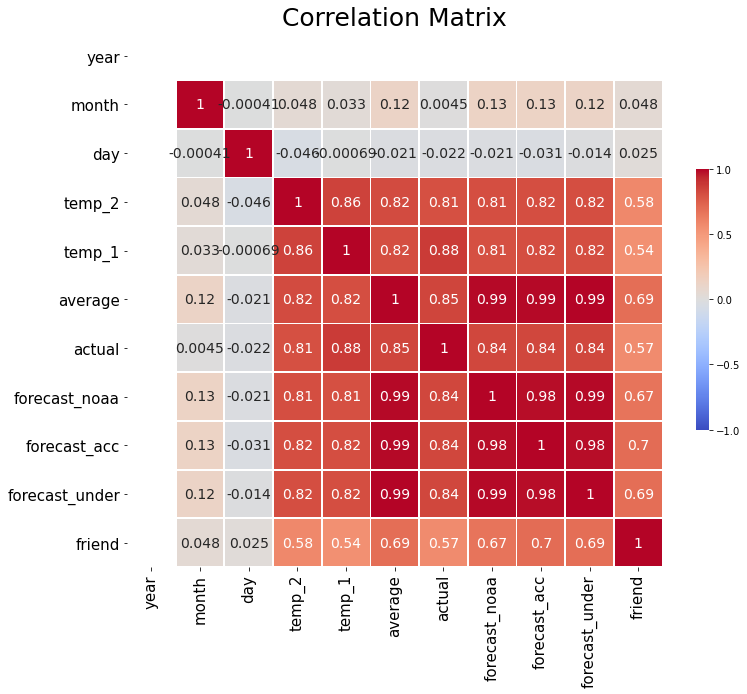

In [13]:
import seaborn as sns
# creating the axis
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(matrix,  square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 14})

ax.set_yticklabels(matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 25)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

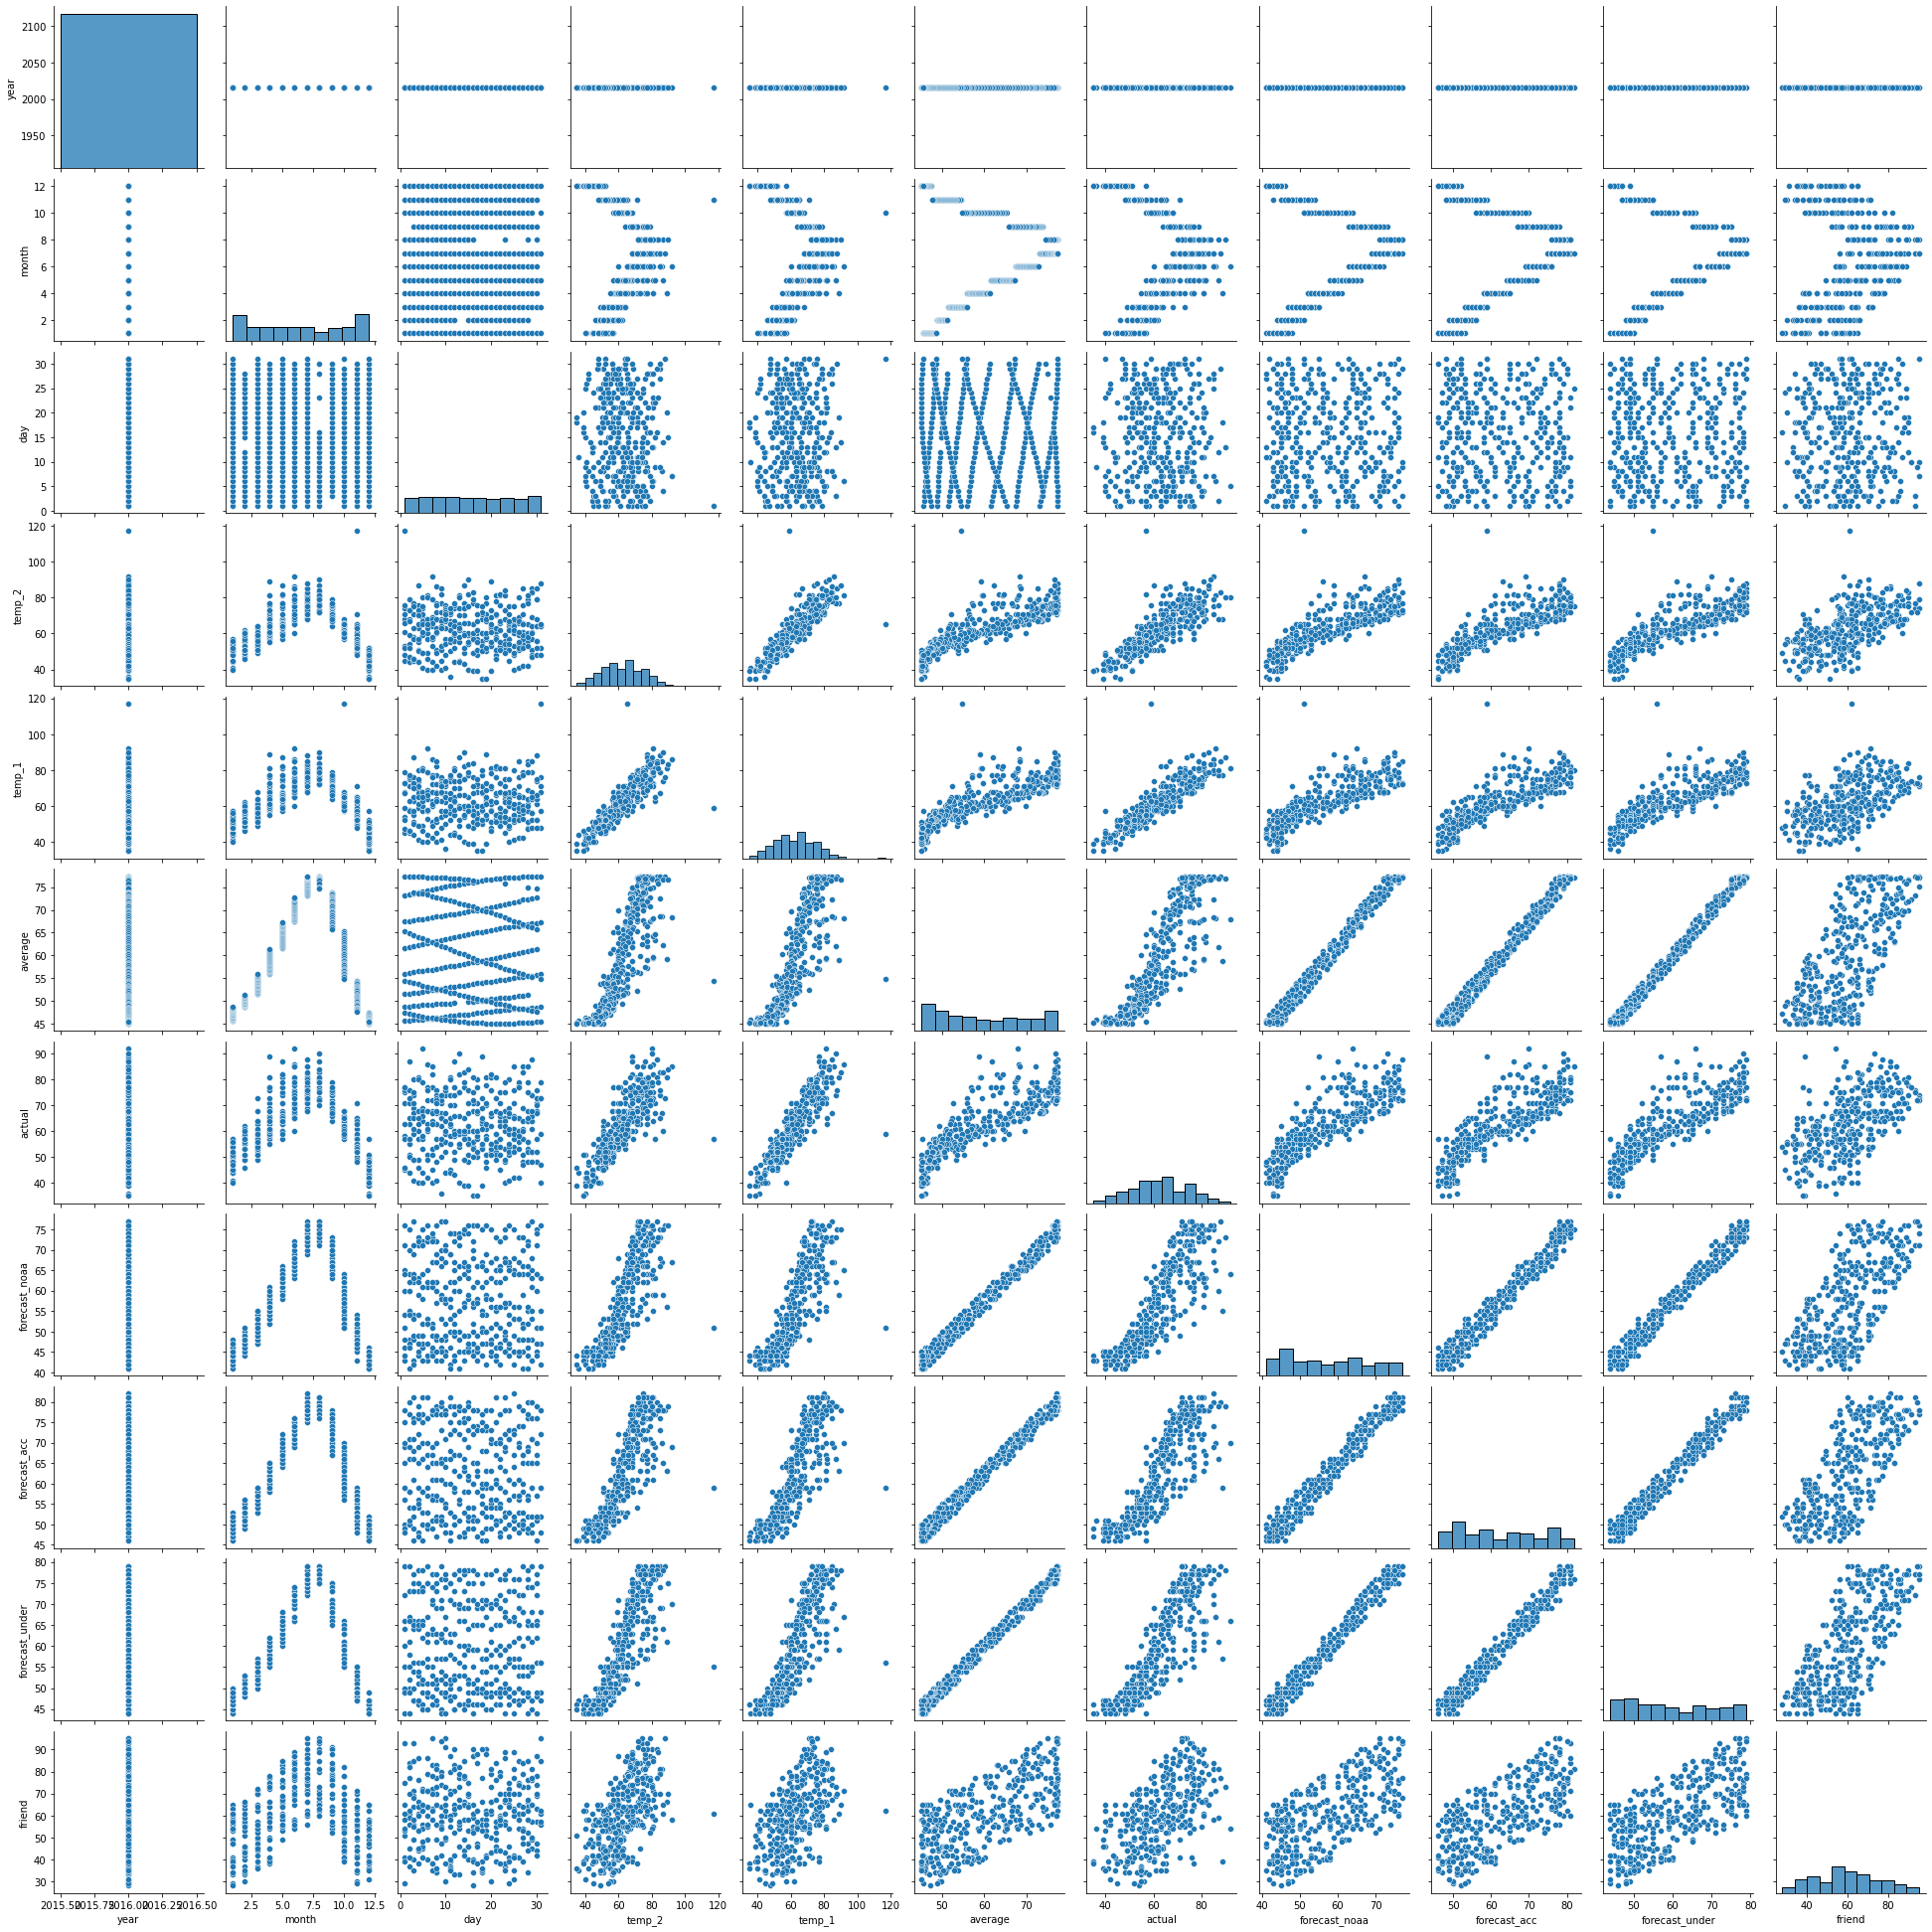

In [14]:
# creating pairplot 
sns.pairplot(features)

# to show
plt.show()

The first step for us is known as one-hot encoding of the data. This process takes categorical variables, such as days of the week and converts it to a numerical representation without an arbitrary ordering. 

In [15]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

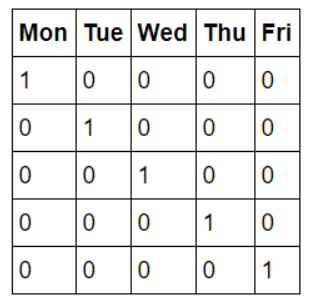

In [16]:
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

average  actual  forecast_noaa  forecast_acc  forecast_under  friend  \
0     45.6      45             43            50              44      29   
1     45.7      44             41            50              44      61   
2     45.8      41             43            46              47      56   
3     45.9      40             44            48              46      53   
4     46.0      44             46            46              46      41   

   week_Fri  week_Mon  week_Sat  week_Sun  week_Thurs  week_Tues  week_Wed  
0         1         0         0         0           0          0         0  
1         0         0         1         0           0          0         0  
2         0         0         0         1           0          0         0  
3         0         1         0         0           0          0         0  
4         0         0         0         0           0          1         0

Separate the data into the features and targets. The target, also known as the label, is the value we want to predict, in this case the actual max temperature and the features are all the columns the model uses to make a prediction. 

In [17]:
target = features['actual']
feature = features.drop(['actual'],axis=1)

In [18]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
#Splitting data into 70/30 Train/Test Split
######Write your answer here########
seed= 1000
np.random.seed(seed)
X_train,X_test,y_train, y_test= train_test_split(feature, target, test_size=0.30)

In [19]:
#uncomment the following lines and replace the '??' with the appropiate code.

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (243, 17)
Training Labels Shape: (243,)
Testing Features Shape: (105, 17)
Testing Labels Shape: (105,)


In [64]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
 
# Instantiate model with 300 decision trees
np.random.seed(seed)
rf = RandomForestRegressor(n_estimators=300, criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=2,
    max_features='auto', bootstrap=True, n_jobs=-1)


# Train the model on training data
######Write your answer here########
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.9839 R= 0.9919


In [65]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.9216 R= 0.96


Text(0.5, 1.0, 'Actual max temperature Training Actual Vs. Prediction')

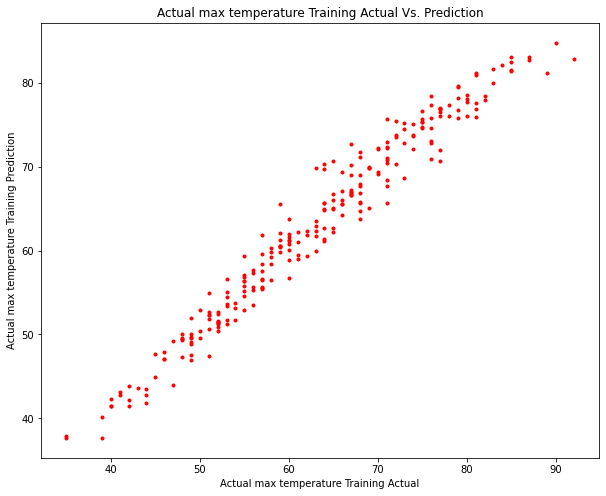

In [24]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'r.')
plt.xlabel('Actual max temperature Training Actual')
plt.ylabel('Actual max temperature Training Prediction')
plt.title('Actual max temperature Training Actual Vs. Prediction')

Actual  Predicted
25       56  50.986667
236      77  74.209724
32       51  47.901611
122      68  64.886872
96       66  69.636300
..      ...        ...
207      88  80.871813
24       54  51.109325
150      71  76.674638
137      66  66.150169
253      69  72.312884

[105 rows x 2 columns]

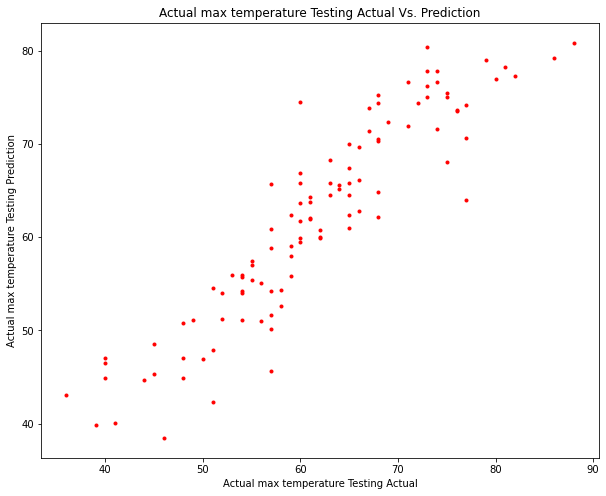

In [22]:
# Use the forest's predict method on the test data
######Write your answer here########
y_pred_test=rf.predict(X_test)
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'r.')
plt.xlabel('Actual max temperature Testing Actual')
plt.ylabel('Actual max temperature Testing Prediction')
plt.title('Actual max temperature Testing Actual Vs. Prediction')

Actual_max_temp_prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
Actual_max_temp_prediction

In [25]:
# Calculate the absolute errors
######Write your answer here########
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(mae,5))

Mean Absolute Error: 3.47764


In [26]:
# Visualize the feature importances

import pandas as pd

# Get feature importances from random forest and convert to list
importances = list(rf.feature_importances_)
feature_list = features.columns[:-1]
d = {'FeatureLabels':feature_list,'Importances':importances} # dictionary data type

df1=pd.DataFrame(d)
df1.sort_values(['Importances'], ascending=False)



FeatureLabels  Importances
5          average     0.381477
4           temp_1     0.378632
6           actual     0.072064
7    forecast_noaa     0.071819
9   forecast_under     0.020992
8     forecast_acc     0.020667
2              day     0.017541
3           temp_2     0.014906
1            month     0.011435
11        week_Fri     0.003867
13        week_Sat     0.002060
16       week_Tues     0.001196
15      week_Thurs     0.001041
12        week_Mon     0.000948
10          friend     0.000920
14        week_Sun     0.000435
0             year     0.000000

Text(0.5, 1.0, 'Feature Importance Ranking')

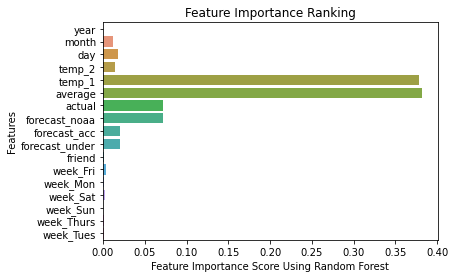

In [27]:
sns.barplot(x=importances, y=feature_list)
plt.xlabel('Feature Importance Score Using Random Forest')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

# Decision Tree In Class exercise

In [28]:
mydata = pd.read_csv("Lecture7_unconv_MV_v2.csv")
mydata_3var =pd.DataFrame(mydata[['Por','Brittle','Production']])
features = mydata_3var[['Por','Brittle']].copy()     # make a new DataFrame with features
response = mydata_3var[['Production']].copy()        # make a new DataFrame with responses

In [29]:
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    
def visualize_tree(tree,xfeature,yfeature,response,title,):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    plt.figure(figsize=(8,6))
    x_min, x_max = min(xfeature) - 1, max(xfeature) + 1
    y_min, y_max = min(yfeature) - 1, max(yfeature) + 1
    resp_min = round(min(response)); resp_max = round(max(response));
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    z_min = round(min(response)); z_max = round(max(response))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max)

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)
    plt.show()
    
def check_tree(tree,xfeature,yfeature,response,title):    # plots the estimated vs. the actual  
    predict_train = tree.predict(np.c_[xfeature,yfeature])
    plt.figure(figsize=(6,6))
    plt.scatter(response,predict_train,s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim(0,7000); plt.ylim(0,7000)
    plt.arrow(0,0,7000,7000,width=0.02,color='black',head_length=0.0,head_width=0.0)
    plt.show()
    MSE = metrics.mean_squared_error(mydata_3var["Production"],predict_train)
    Var_Explained = metrics.explained_variance_score(mydata_3var["Production"],predict_train)
    cor = math.sqrt(metrics.r2_score(mydata_3var["Production"],predict_train))
    print('Mean Squared Error on Training = ', round(MSE,2),', Varianace Explained =', round(Var_Explained,2),'Cor =', round(cor,2))

def tree_to_code(tree, feature_names):                    # code from StackOverFlow by paulkernfeld
    tree_ = tree.tree_                                    # convert tree object to portable code to use anywhere
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}elif {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1) 
    
def get_lineage(tree, feature_names):                     # code from StackOverFlow by Zelanzny7
    left      = tree.tree_.children_left                  # track the decision path for any set of inputs
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     
    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'
        lineage.append((parent, split, threshold[parent], features[parent]))
        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)
    for child in idx:
        for node in recurse(left, right, child):
            print(node) 
            

# Define an evaluation function for calculating some helpful metrics
# We can calculate the mean square error and the square root of the MSE for our prediction model.

def evaluate (model, test_features, test_labels):
    predictions=model.predict(test_features)
    r2=r2_score(y_pred=predictions, y_true=test_labels)
    MAE=mean_absolute_error(test_labels, predictions)
    MSE=mean_squared_error(test_labels, predictions)
    rmse = sqrt(MSE)

    print('r2 = {:0.2f}'.format(r2))
    print('MAE = {:0.2f}'.format(MAE))
    print('Mean Square Error = {:0.2f}'.format(MSE))
    print('Squareroot Mean Square Error = {:0.2f}'.format(rmse))

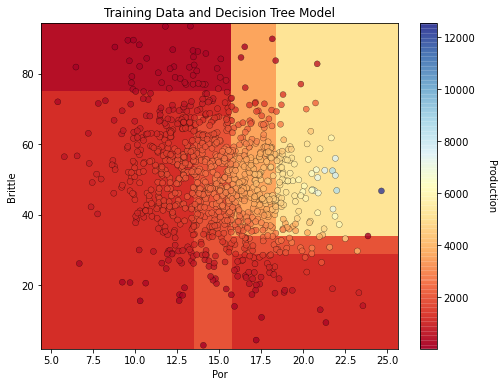

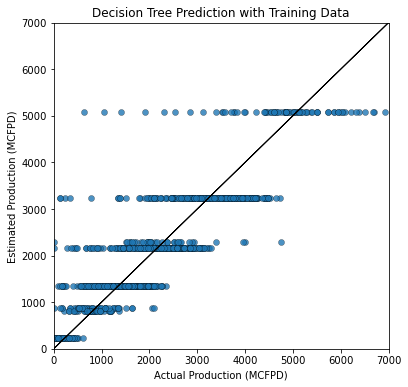

Mean Squared Error on Training =  610129.7 , Varianace Explained = 0.72 Cor = 0.85


In [30]:
my_tree = tree.DecisionTreeRegressor(min_samples_leaf=5, max_depth = 3)
my_tree = my_tree.fit(features, response)

visualize_tree(my_tree,mydata_3var["Por"],mydata_3var["Brittle"],mydata_3var["Production"],'Training Data and Decision Tree Model')

check_tree(my_tree,mydata_3var["Por"],mydata_3var["Brittle"],mydata_3var["Production"],'Decision Tree Prediction with Training Data')

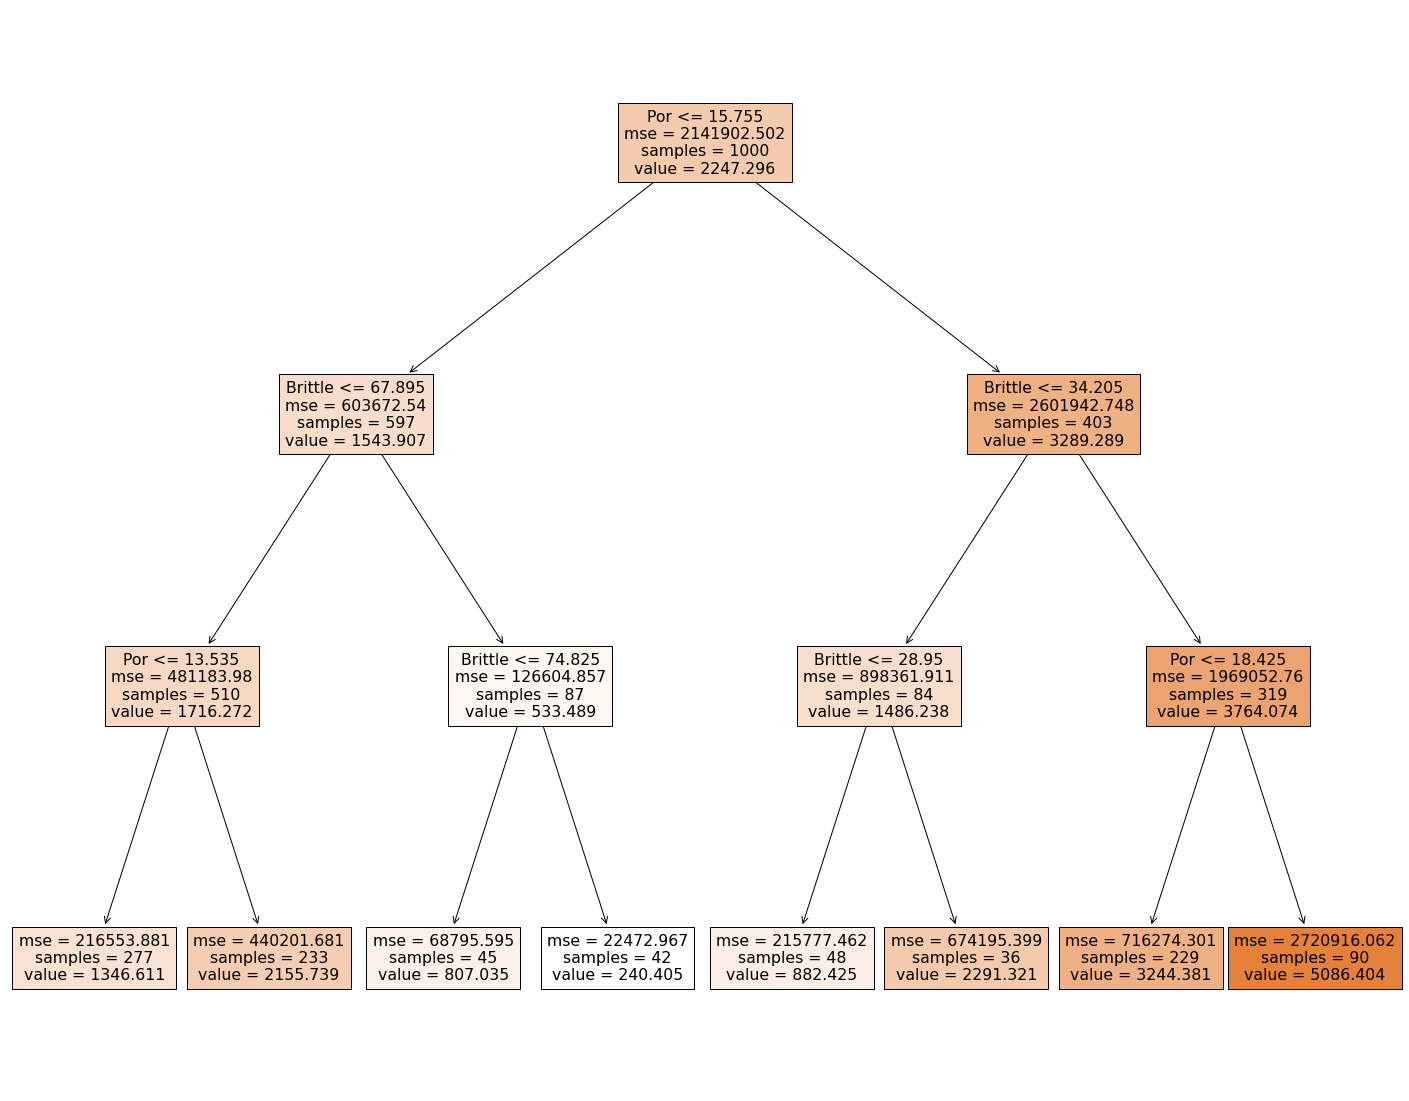

In [31]:
from sklearn import tree
feature_names=['Por','Brittle']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(my_tree, 
                   feature_names=list(features),  
                   filled=True)

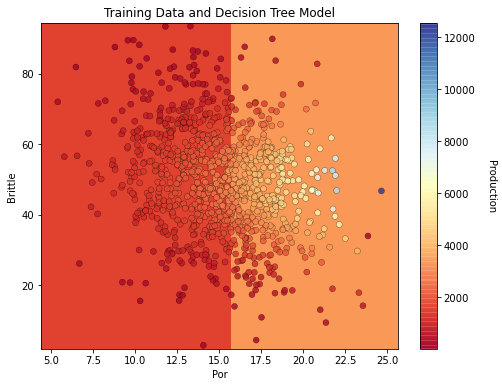

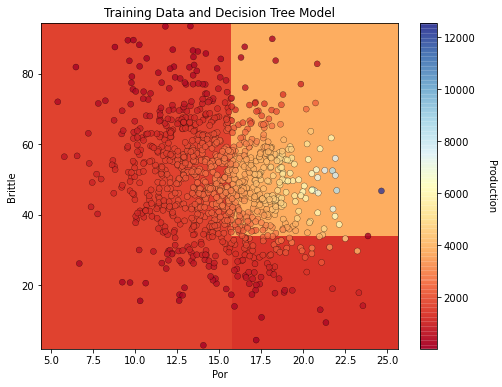

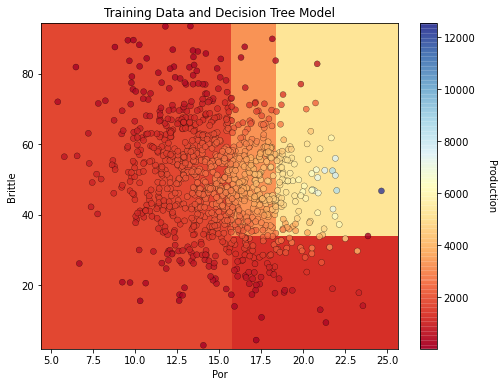

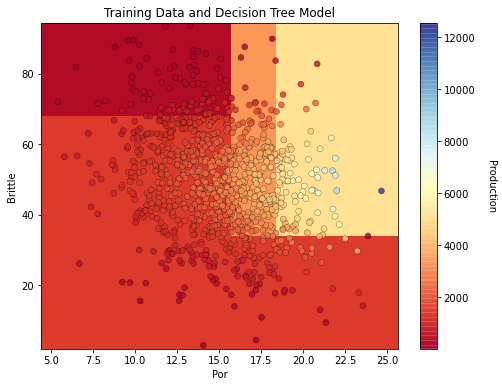

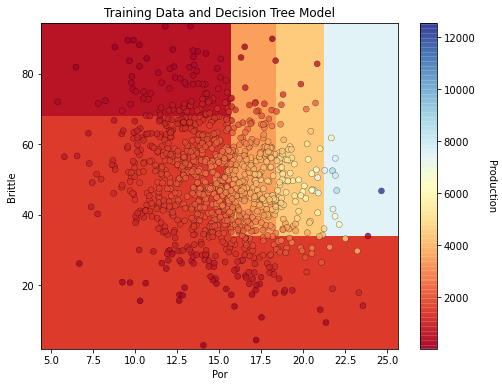

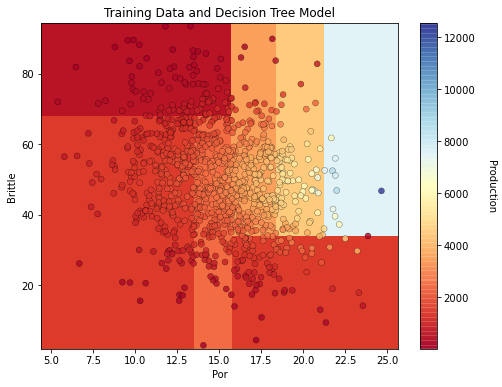

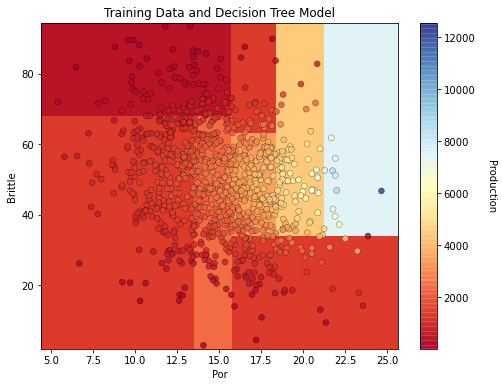

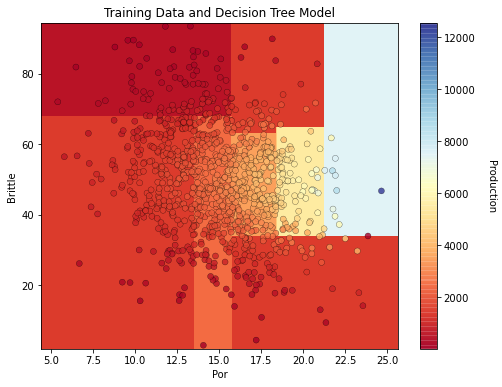

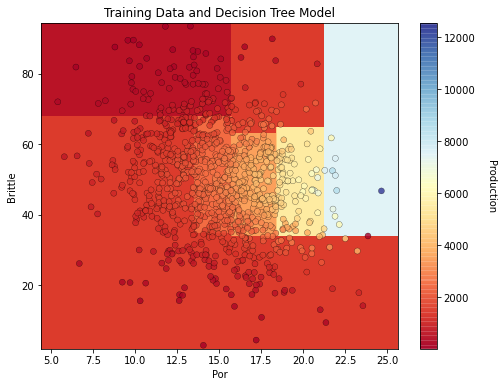

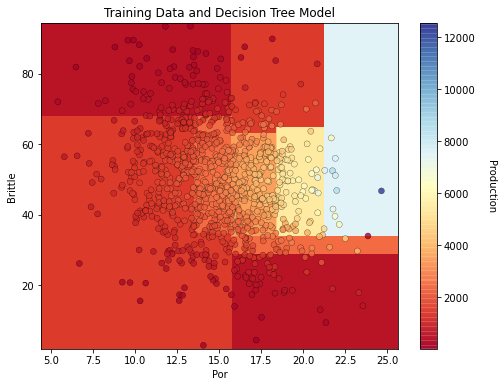

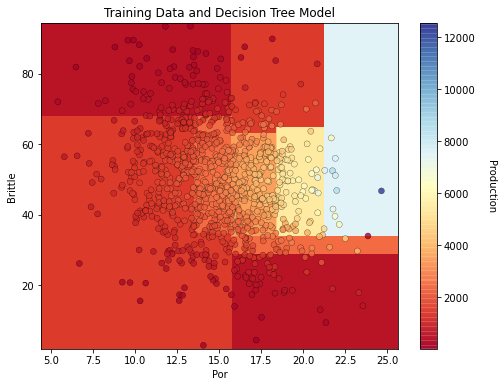

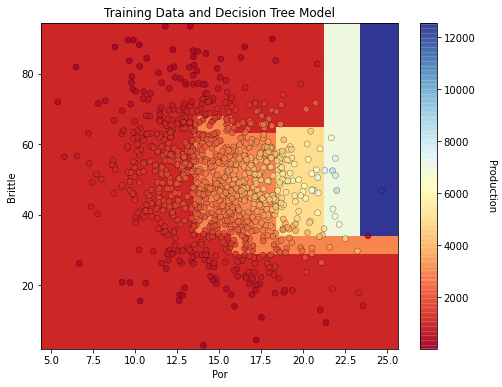

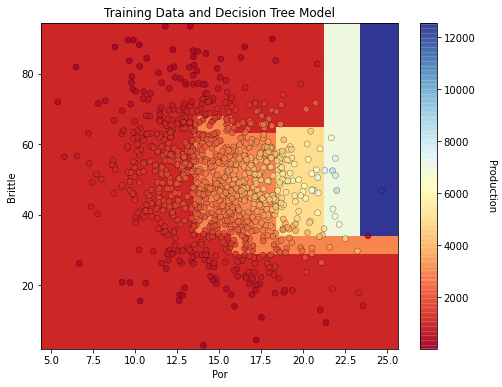

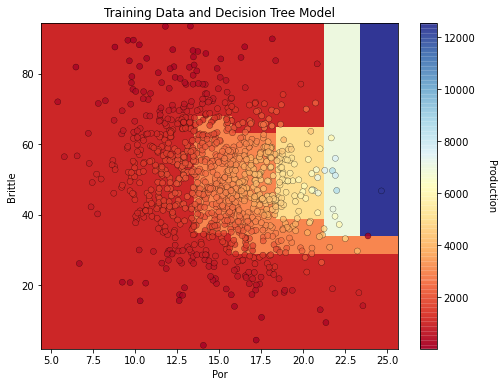

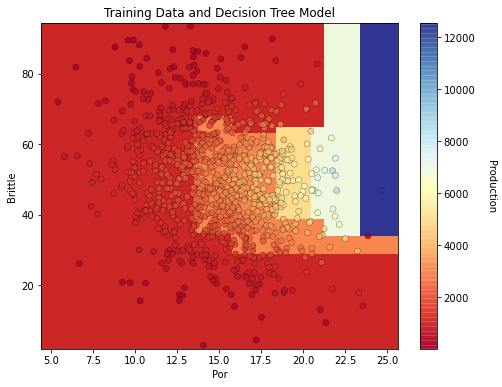

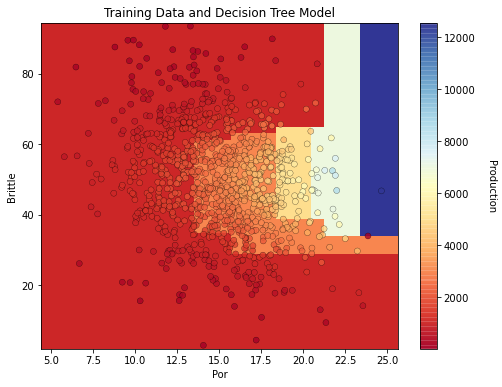

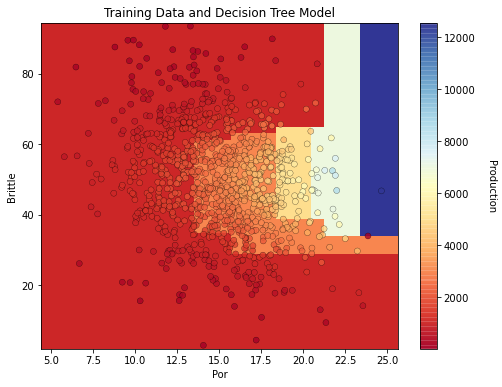

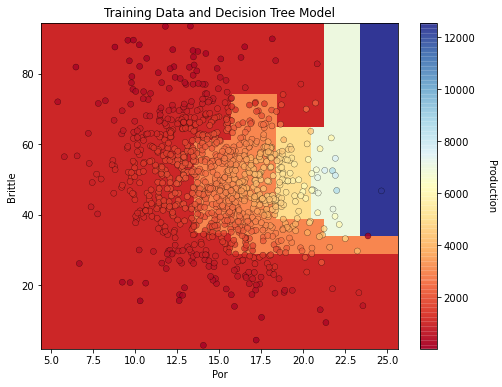

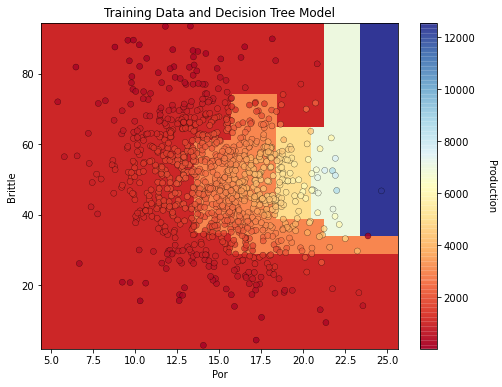

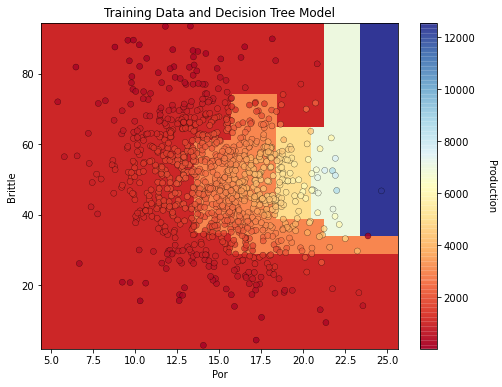

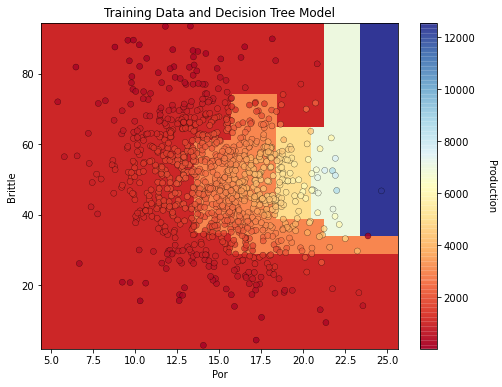

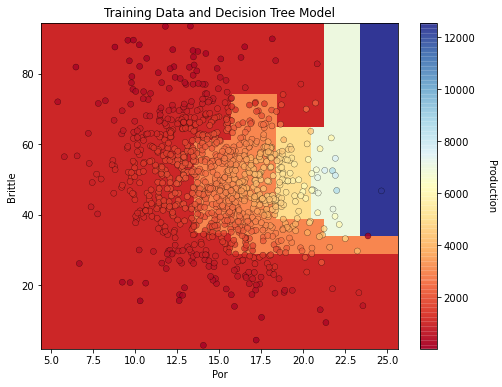

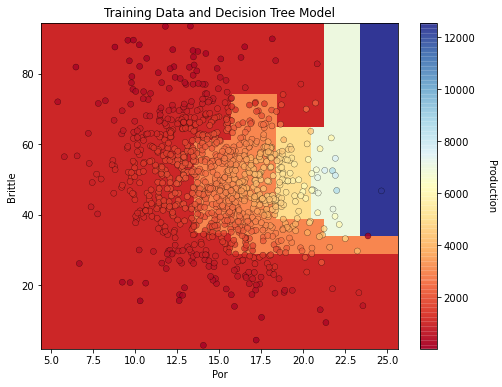

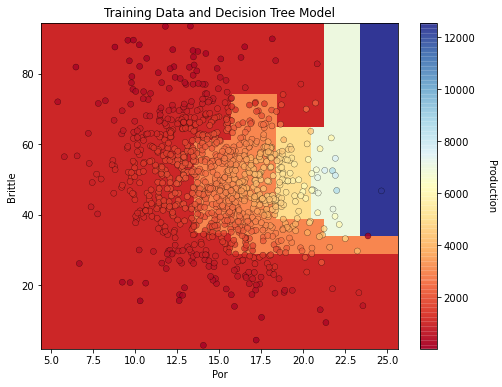

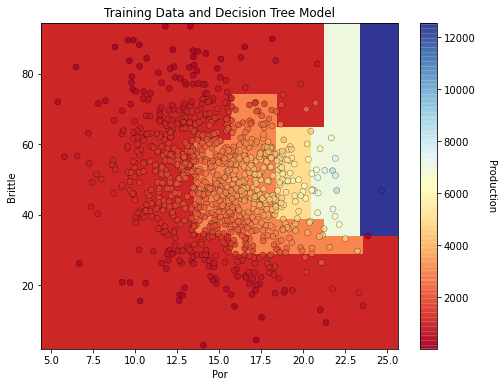

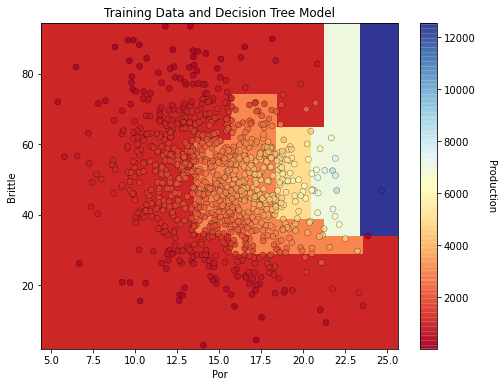

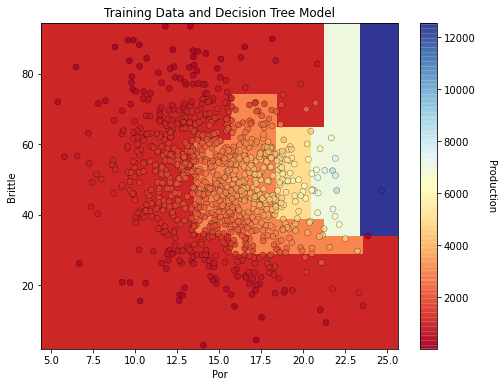

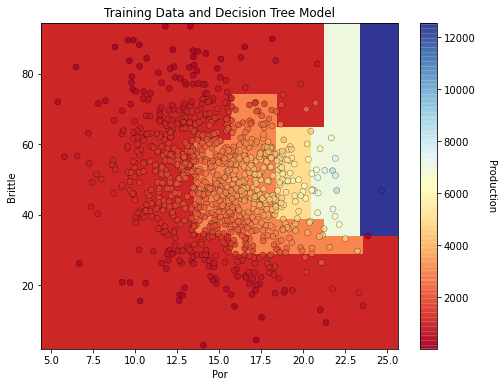

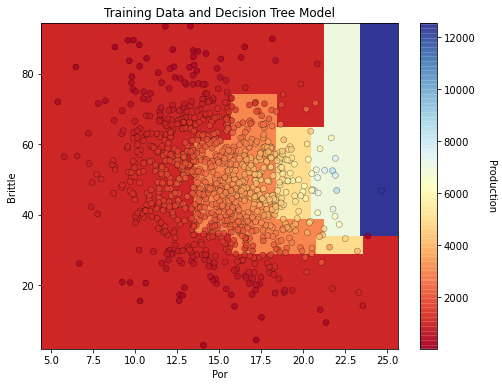

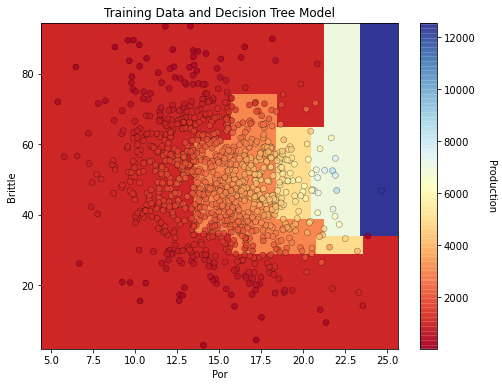

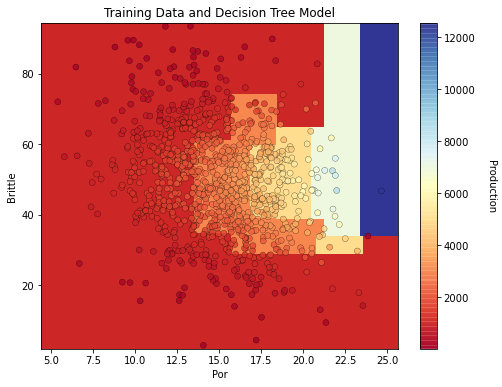

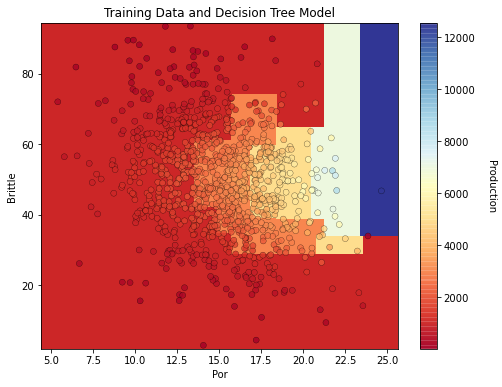

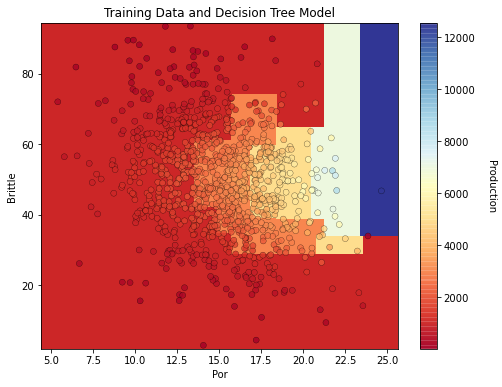

In [32]:
trees = []
error = []
var_exp = [] 
nodes = []

inodes = 2
while inodes < 35:
    my_tree = tree.DecisionTreeRegressor(min_samples_leaf=1,max_leaf_nodes=inodes)
    my_tree = my_tree.fit(features, response)
    trees.append(my_tree)
    visualize_tree(my_tree,mydata_3var["Por"],mydata_3var["Brittle"],mydata_3var["Production"],'Training Data and Decision Tree Model')

    predict_train = my_tree.predict(np.c_[mydata_3var["Por"],mydata_3var["Brittle"]])
    
    error.append(metrics.mean_squared_error(mydata_3var["Production"],predict_train))
    var_exp.append(metrics.explained_variance_score(mydata_3var["Production"],predict_train))    

    all_nodes = my_tree.tree_.node_count             
    decision_nodes = len([x for x in my_tree.tree_.feature if x != _tree.TREE_UNDEFINED]) 
    terminal_nodes = all_nodes - decision_nodes
    nodes.append(terminal_nodes)
    
    inodes+=1

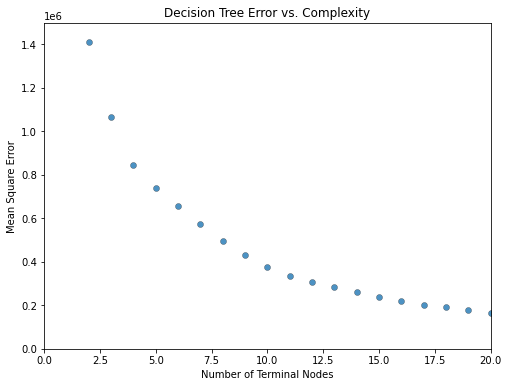

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(nodes,error,s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Decision Tree Error vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); plt.ylabel('Mean Square Error')
plt.xlim(0,20); plt.ylim(0,1500000)
plt.show()

In [34]:
score = []                    
node = []
for inodes in range(2,50):
    my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=inodes) 
    scores = cross_val_score(estimator=my_tree, X= np.c_[mydata['Por'],mydata['Brittle']],y=mydata['Production'], cv=2, n_jobs=4,scoring = "neg_mean_squared_error") # Perform 7-fold cross validation
    score.append(abs(scores.mean()))
    node.append(inodes)

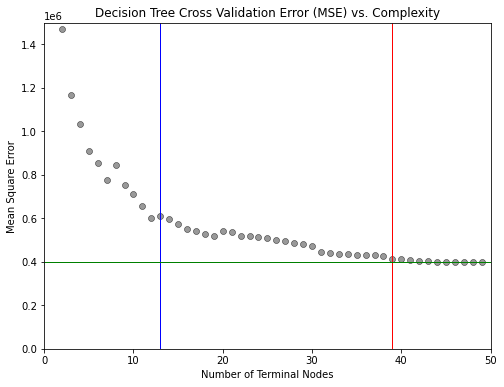

In [35]:
plt.figure(figsize=(8,6))
plt.arrow(39,0,0,1500000,width=0.02,color='red',head_length=0.0,head_width=0.0)
plt.arrow(13,0,0,1500000,width=0.02,color='blue',head_length=0.0,head_width=0.0)
plt.arrow(0,400000,90,0,width=0.02,color='green',head_length=0.0,head_width=0.0)
plt.scatter(node,score,s=None, c="grey", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.5, edgecolors="black")
plt.title('Decision Tree Cross Validation Error (MSE) vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); plt.ylabel('Mean Square Error')
plt.xlim(0,50); plt.ylim(0,1500000)
plt.show()

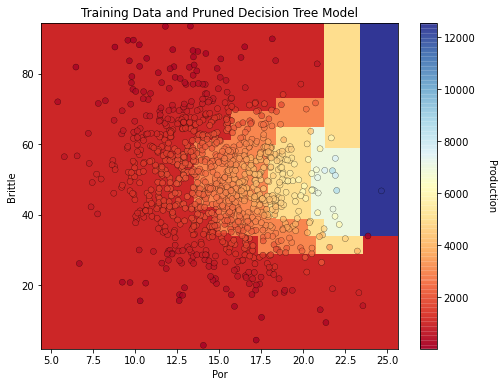

In [36]:
my_pruned_tree = tree.DecisionTreeRegressor(min_samples_leaf=1,max_leaf_nodes=12)
my_pruned_tree = my_tree.fit(features, response)

visualize_tree(my_tree,mydata_3var["Por"],mydata_3var["Brittle"],mydata_3var["Production"],'Training Data and Pruned Decision Tree Model')

In [37]:
# We will use random processes, to ensure repeatability between runs let's set the random seed
import random

np.random.seed(0)
random=random.seed(71071)

In [38]:
np.random.seed(71071)

In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor

X=mydata_3var.drop(columns='Production')
y=mydata_3var['Production']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=500,random_state=71071)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4,min_samples_split=0.01,min_samples_leaf=10)
regr_2 = DecisionTreeRegressor(max_depth=15)

regr_1.fit(X=X_train, y=y_train)
regr_2.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=15)

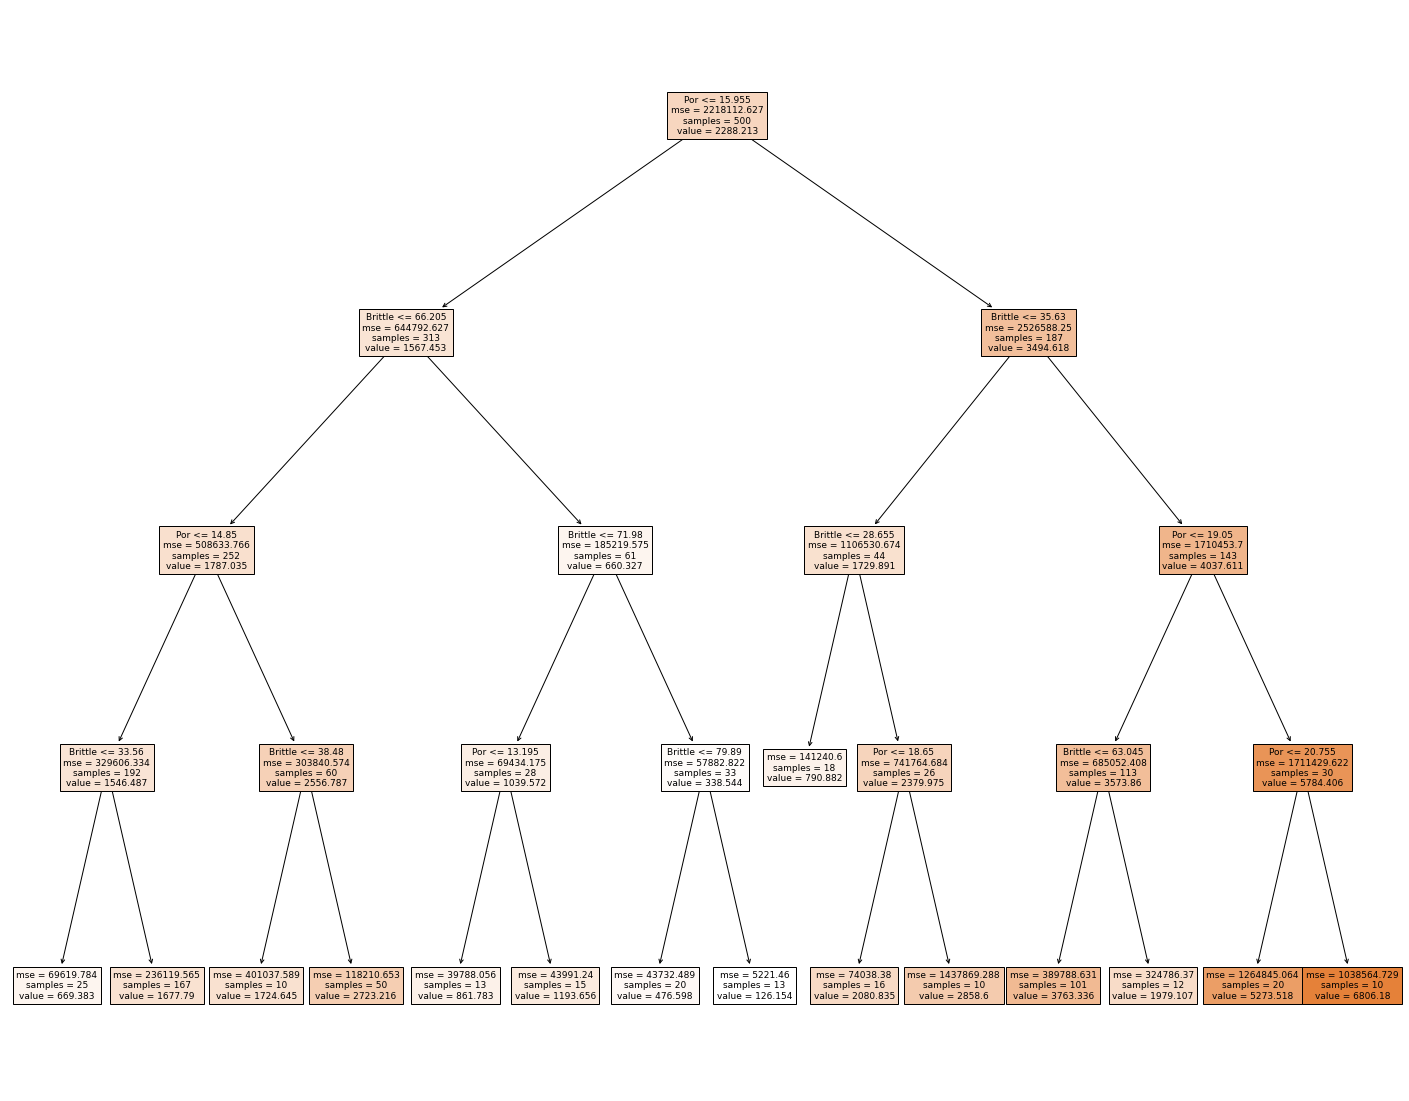

In [40]:
from sklearn import tree
feature_names=['Por','Brittle']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr_1, 
                   feature_names=feature_names,  
                   filled=True)

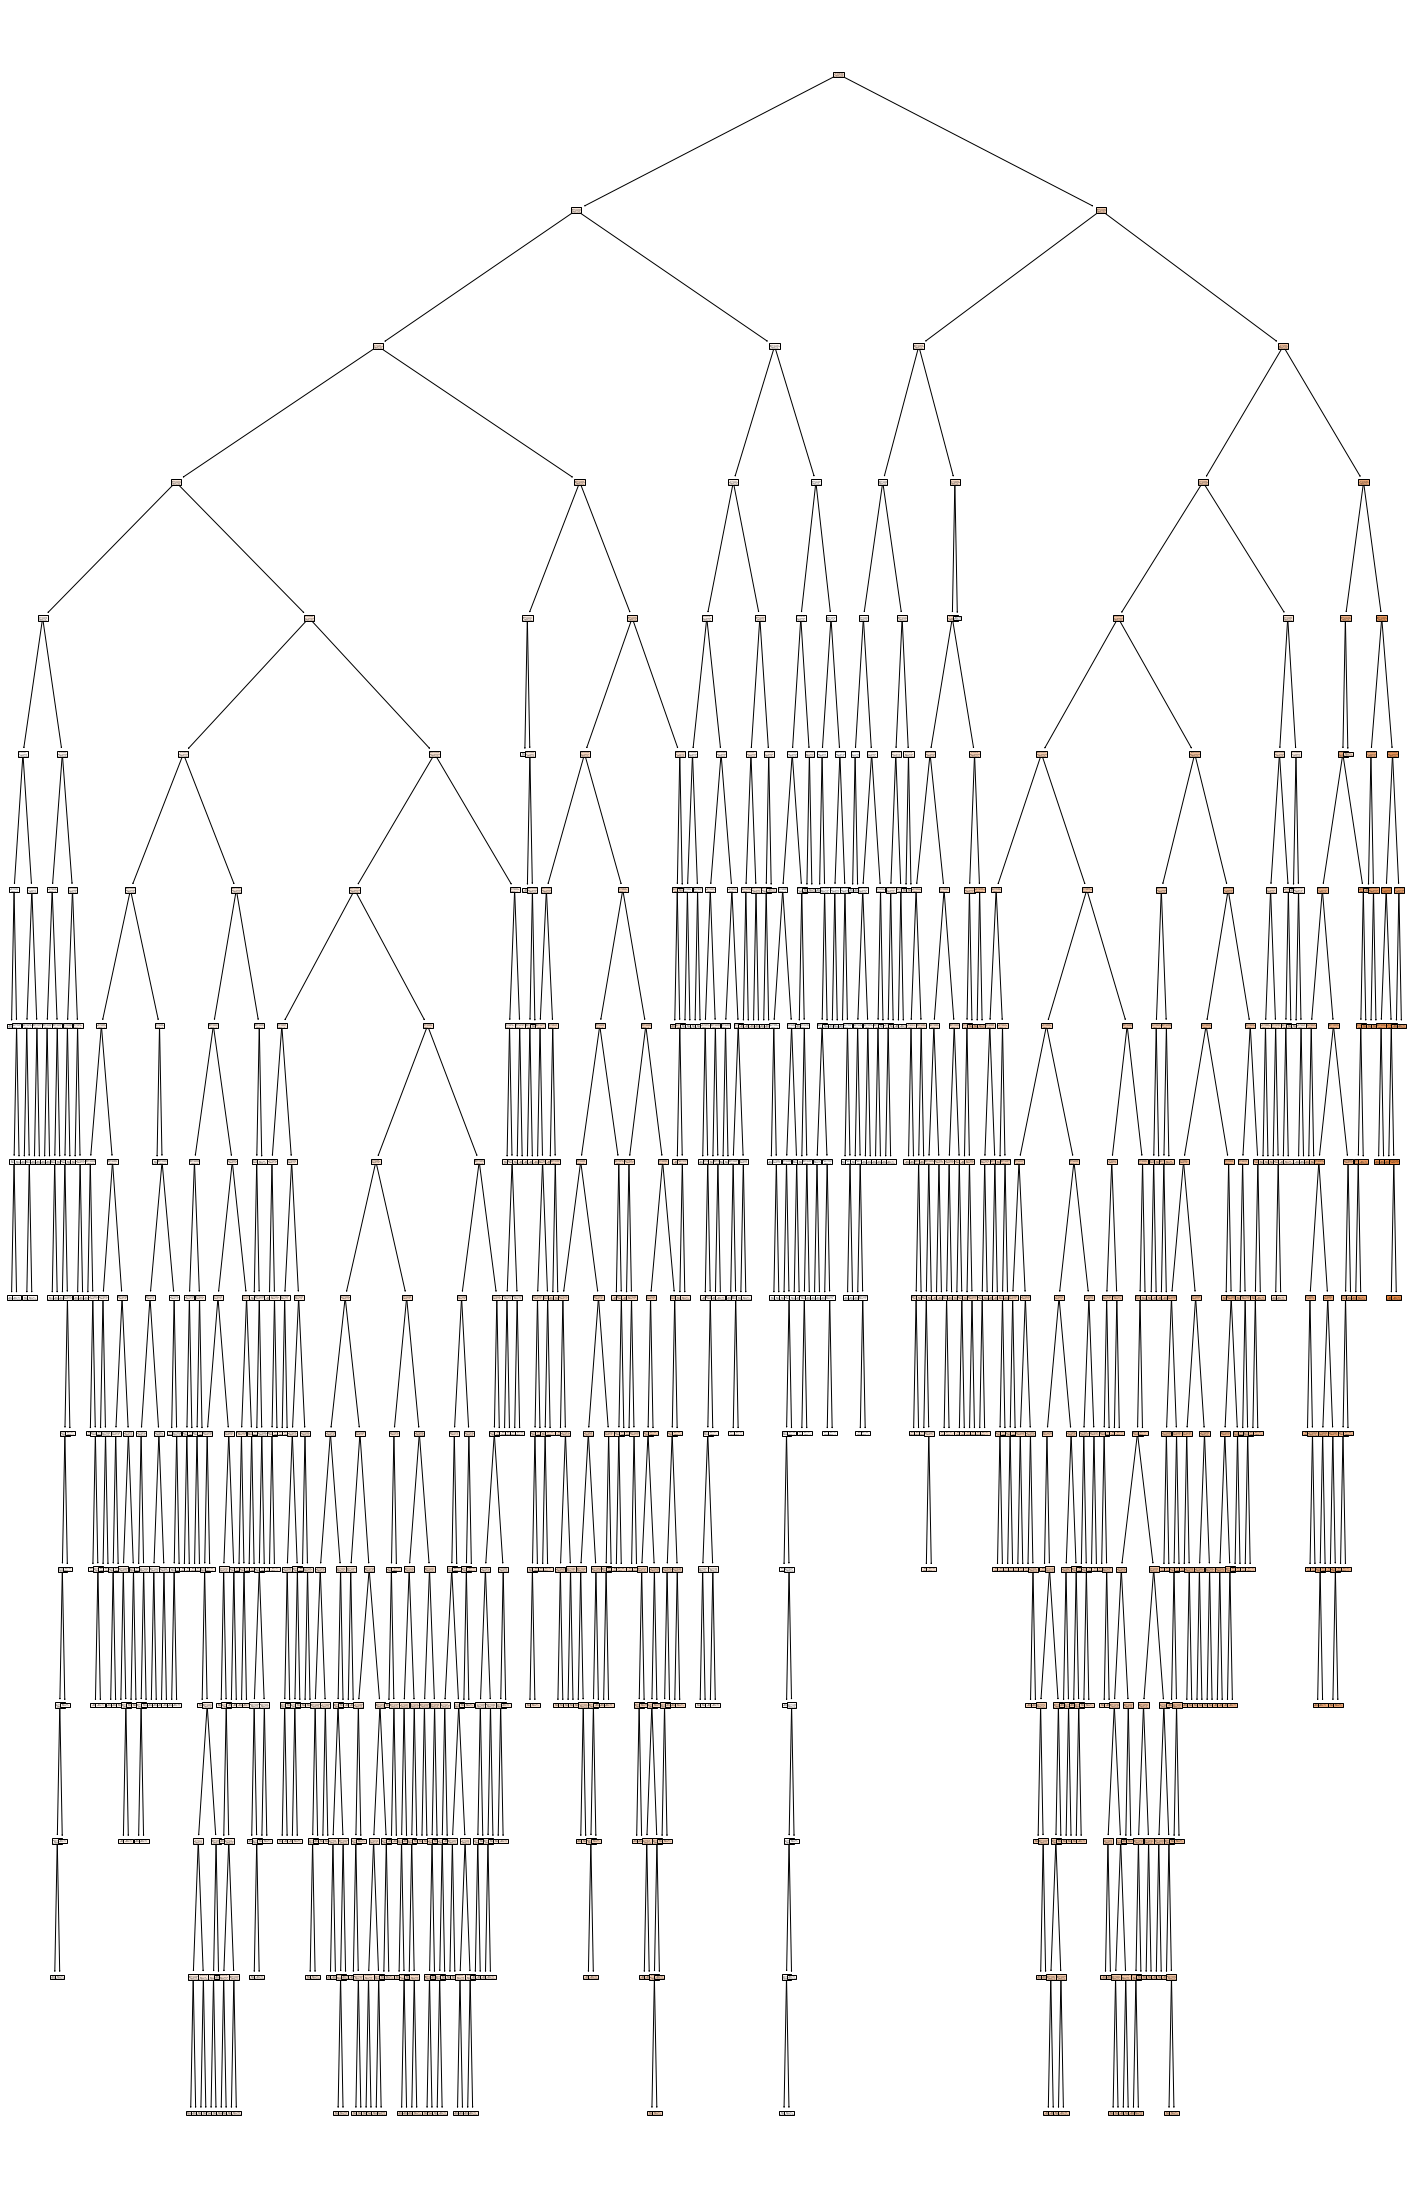

In [41]:
from sklearn import tree
feature_names=['Por','Brittle']

fig = plt.figure(figsize=(25,40))
_ = tree.plot_tree(regr_2, 
                   feature_names=feature_names,  
                   filled=True)

In [42]:
#use a grid search Over a specified range of possible hyperparameters values
parameters={
    'max_depth':range(3,10),
    'min_samples_split':[2,3,4],
    'ccp_alpha':np.arange(0,0.2,10)
}

In [43]:
reg_3=GridSearchCV(tree.DecisionTreeRegressor(),
                  parameters,
                  cv=10,
                  n_jobs=-1)

In [44]:
reg_3.fit(X=X_train, y=y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.]), 'max_depth': range(3, 10),
                         'min_samples_split': [2, 3, 4]})

In [45]:
#extract best CV model and print its accuracy measure
cv_best_model=reg_3.best_estimator_
print("Best CV Accuracy: {}, with parameters: {}".format(reg_3.best_score_,reg_3.best_params_))

Best CV Accuracy: 0.8804694048309628, with parameters: {'ccp_alpha': 0.0, 'max_depth': 8, 'min_samples_split': 4}


In [46]:
# Let's use our trees to make predictions on test data
y_1 = regr_1.predict(X_test)  
y_2 = regr_2.predict(X_test)
y_3=cv_best_model.predict(X_test)

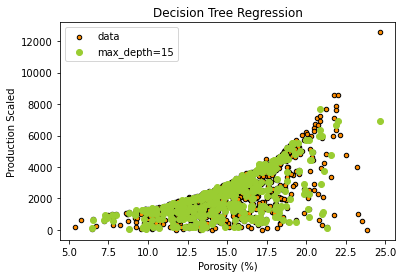

In [47]:
# We can plot the predictions vs. the test data set.
# Plot the results
plt.figure()
plt.scatter(X['Por'], y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(X_test['Por'], y_2, color="yellowgreen", label="max_depth=15")
plt.xlabel("Porosity (%)")
plt.ylabel("Production Scaled")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

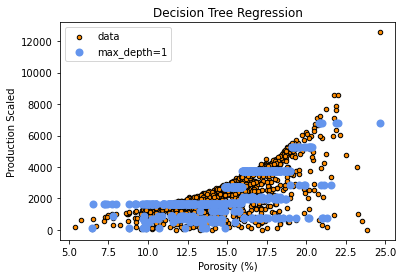

In [48]:
# Plot the results
plt.figure()
plt.scatter(X['Por'], y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(X_test['Por'], y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.xlabel("Porosity (%)")
plt.ylabel("Production Scaled")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

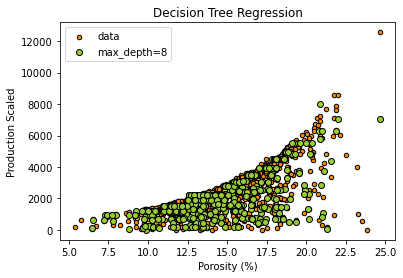

In [49]:
# Plot the results
plt.figure()
plt.scatter(X['Por'], y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(X_test['Por'], y_3, edgecolor="black",color="yellowgreen", label="max_depth=8")
plt.xlabel("Porosity (%)")
plt.ylabel("Production Scaled")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Define an evaluation function for calculating some helpful metrics
# We can calculate the mean square error and the square root of the MSE for our prediction model.

def evaluate (model, test_features, test_labels):
    predictions=model.predict(test_features)
    r2=r2_score(y_pred=predictions, y_true=test_labels)
    MAE=mean_absolute_error(test_labels, predictions)
    MSE=mean_squared_error(test_labels, predictions)
    rmse = sqrt(MSE)

    print('r2 = {:0.2f}'.format(r2))
    print('MAE = {:0.2f}'.format(MAE))
    print('Mean Square Error = {:0.2f}'.format(MSE))
    print('Squareroot Mean Square Error = {:0.2f}'.format(rmse))

In [51]:
evaluate(cv_best_model,X_test,y_test)

r2 = 0.90
MAE = 223.67
Mean Square Error = 211877.85
Squareroot Mean Square Error = 460.30


In [52]:
evaluate(regr_1,X_test,y_test)

r2 = 0.76
MAE = 458.99
Mean Square Error = 502498.71
Squareroot Mean Square Error = 708.87


In [53]:
evaluate(regr_2,X_test,y_test)

r2 = 0.91
MAE = 180.47
Mean Square Error = 184975.02
Squareroot Mean Square Error = 430.09


# Working with more and less complicated trees

In [54]:
regr_4 = DecisionTreeRegressor(max_depth=45)
regr_4.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=45)

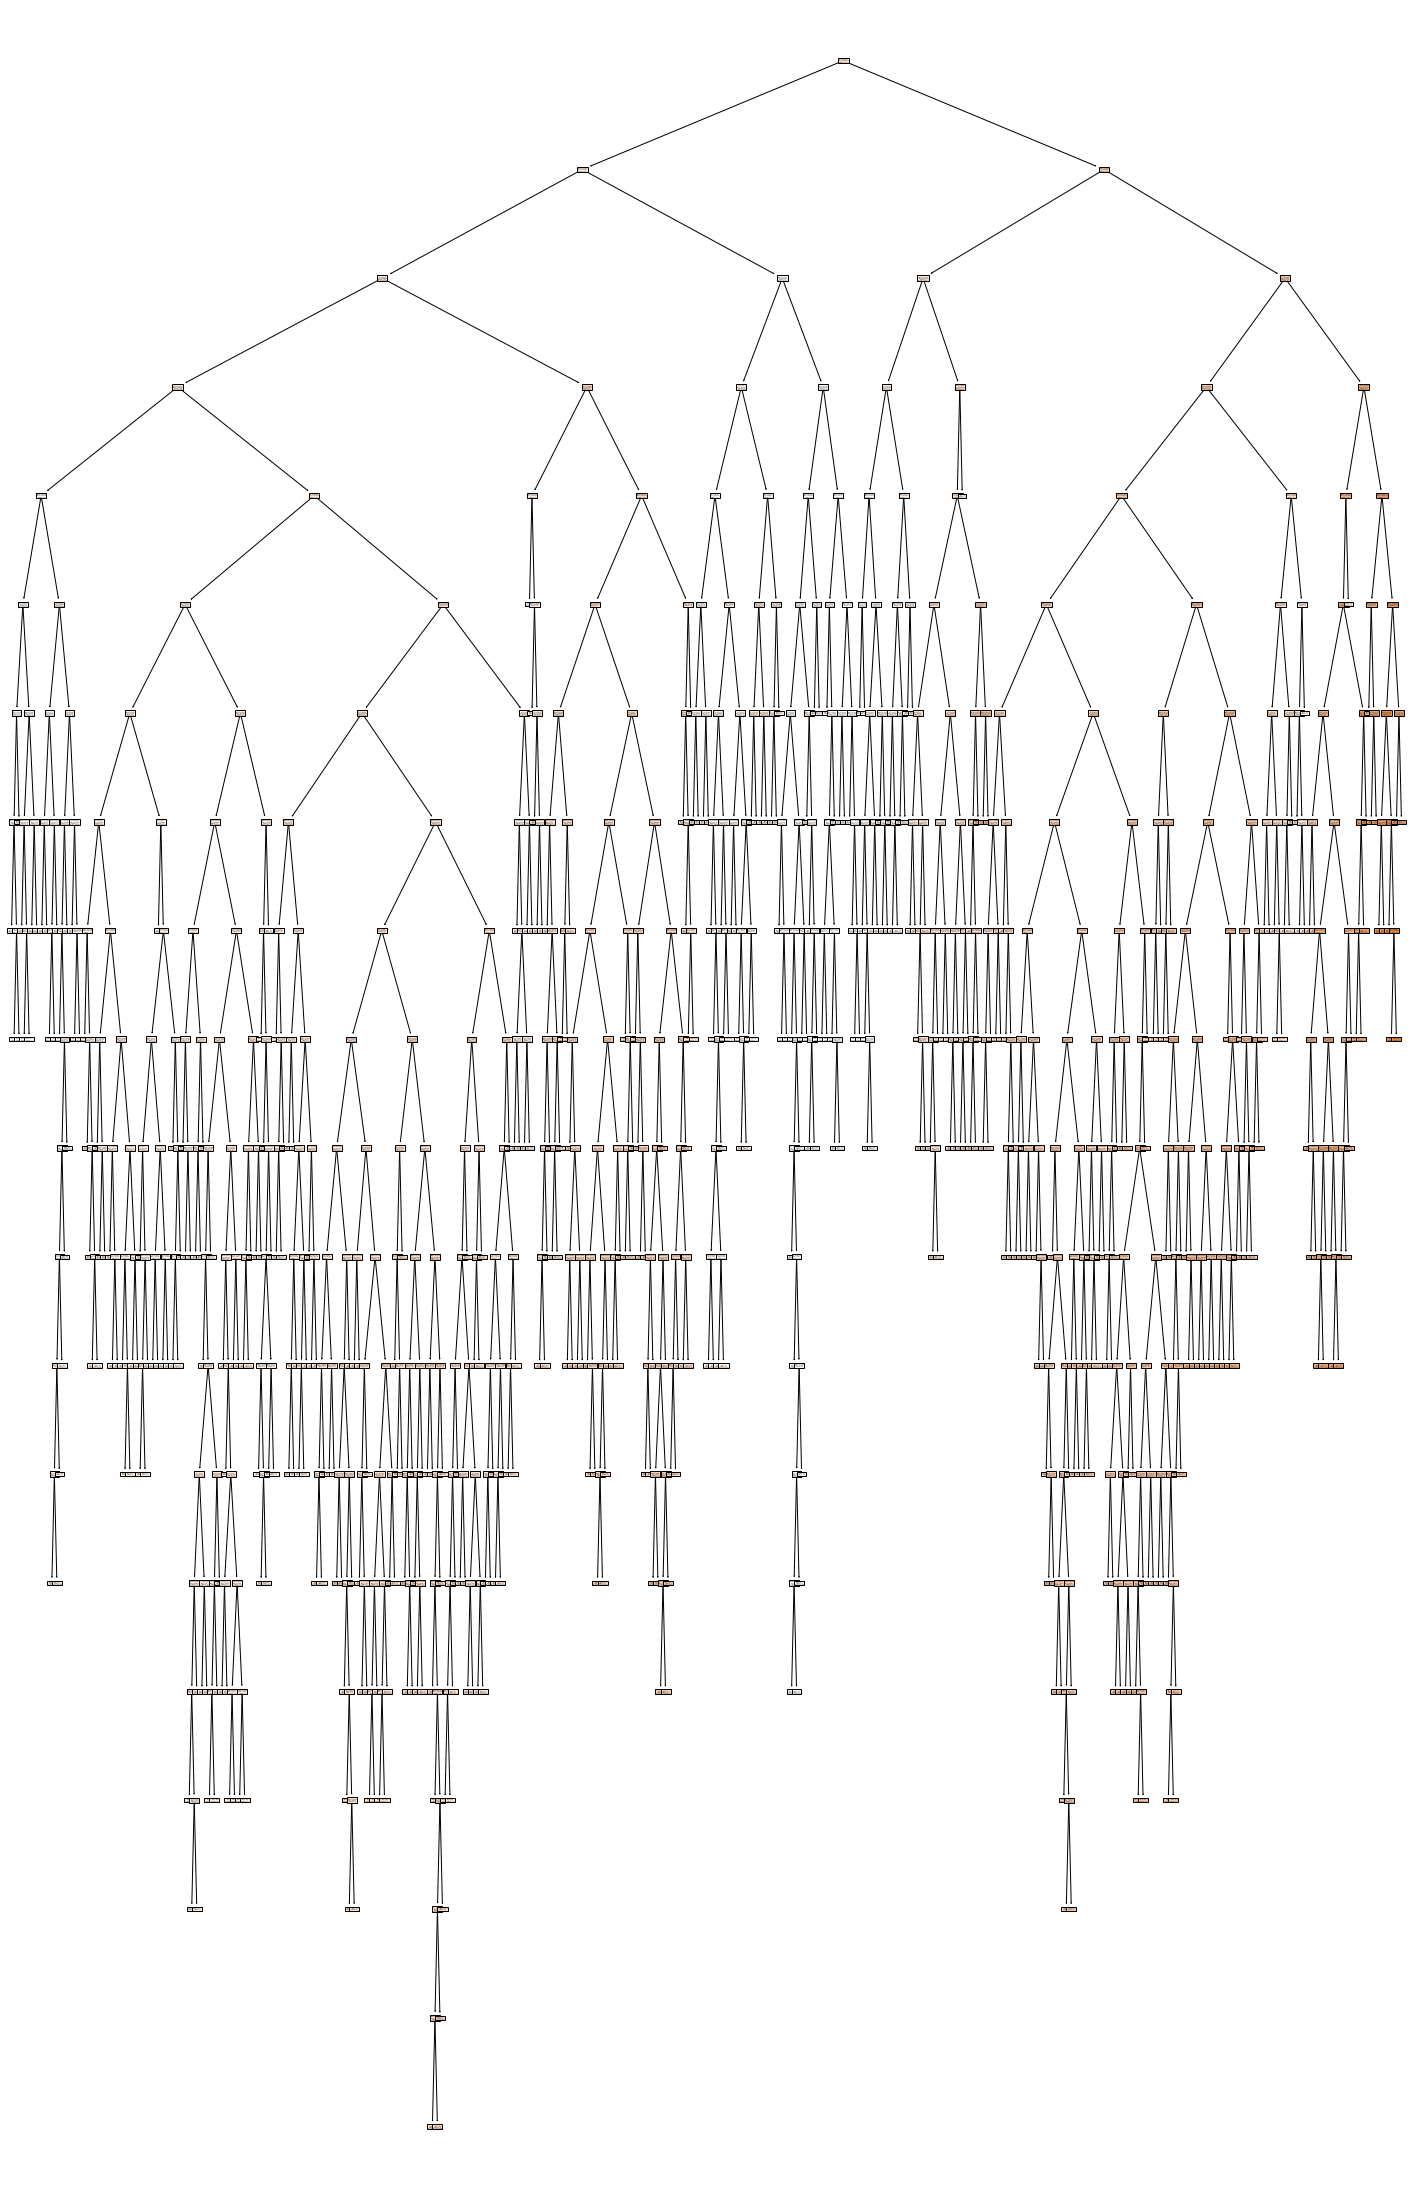

In [55]:
from sklearn import tree
feature_names=['Por','Brittle']

fig = plt.figure(figsize=(25,40))
_ = tree.plot_tree(regr_4, 
                   feature_names=feature_names,  
                   filled=True)

In [56]:
y_4 = regr_4.predict(X_test)

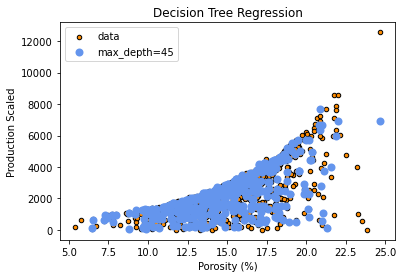

In [57]:
# Plot the results
plt.figure()
plt.scatter(X['Por'], y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(X_test['Por'], y_4, color="cornflowerblue",
         label="max_depth=45", linewidth=2)
plt.xlabel("Porosity (%)")
plt.ylabel("Production Scaled")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [58]:
evaluate(regr_4,X_test,y_test)

r2 = 0.90
MAE = 179.22
Mean Square Error = 198031.65
Squareroot Mean Square Error = 445.01


In [59]:
regr_5 = DecisionTreeRegressor(max_depth=3)
regr_5.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=3)

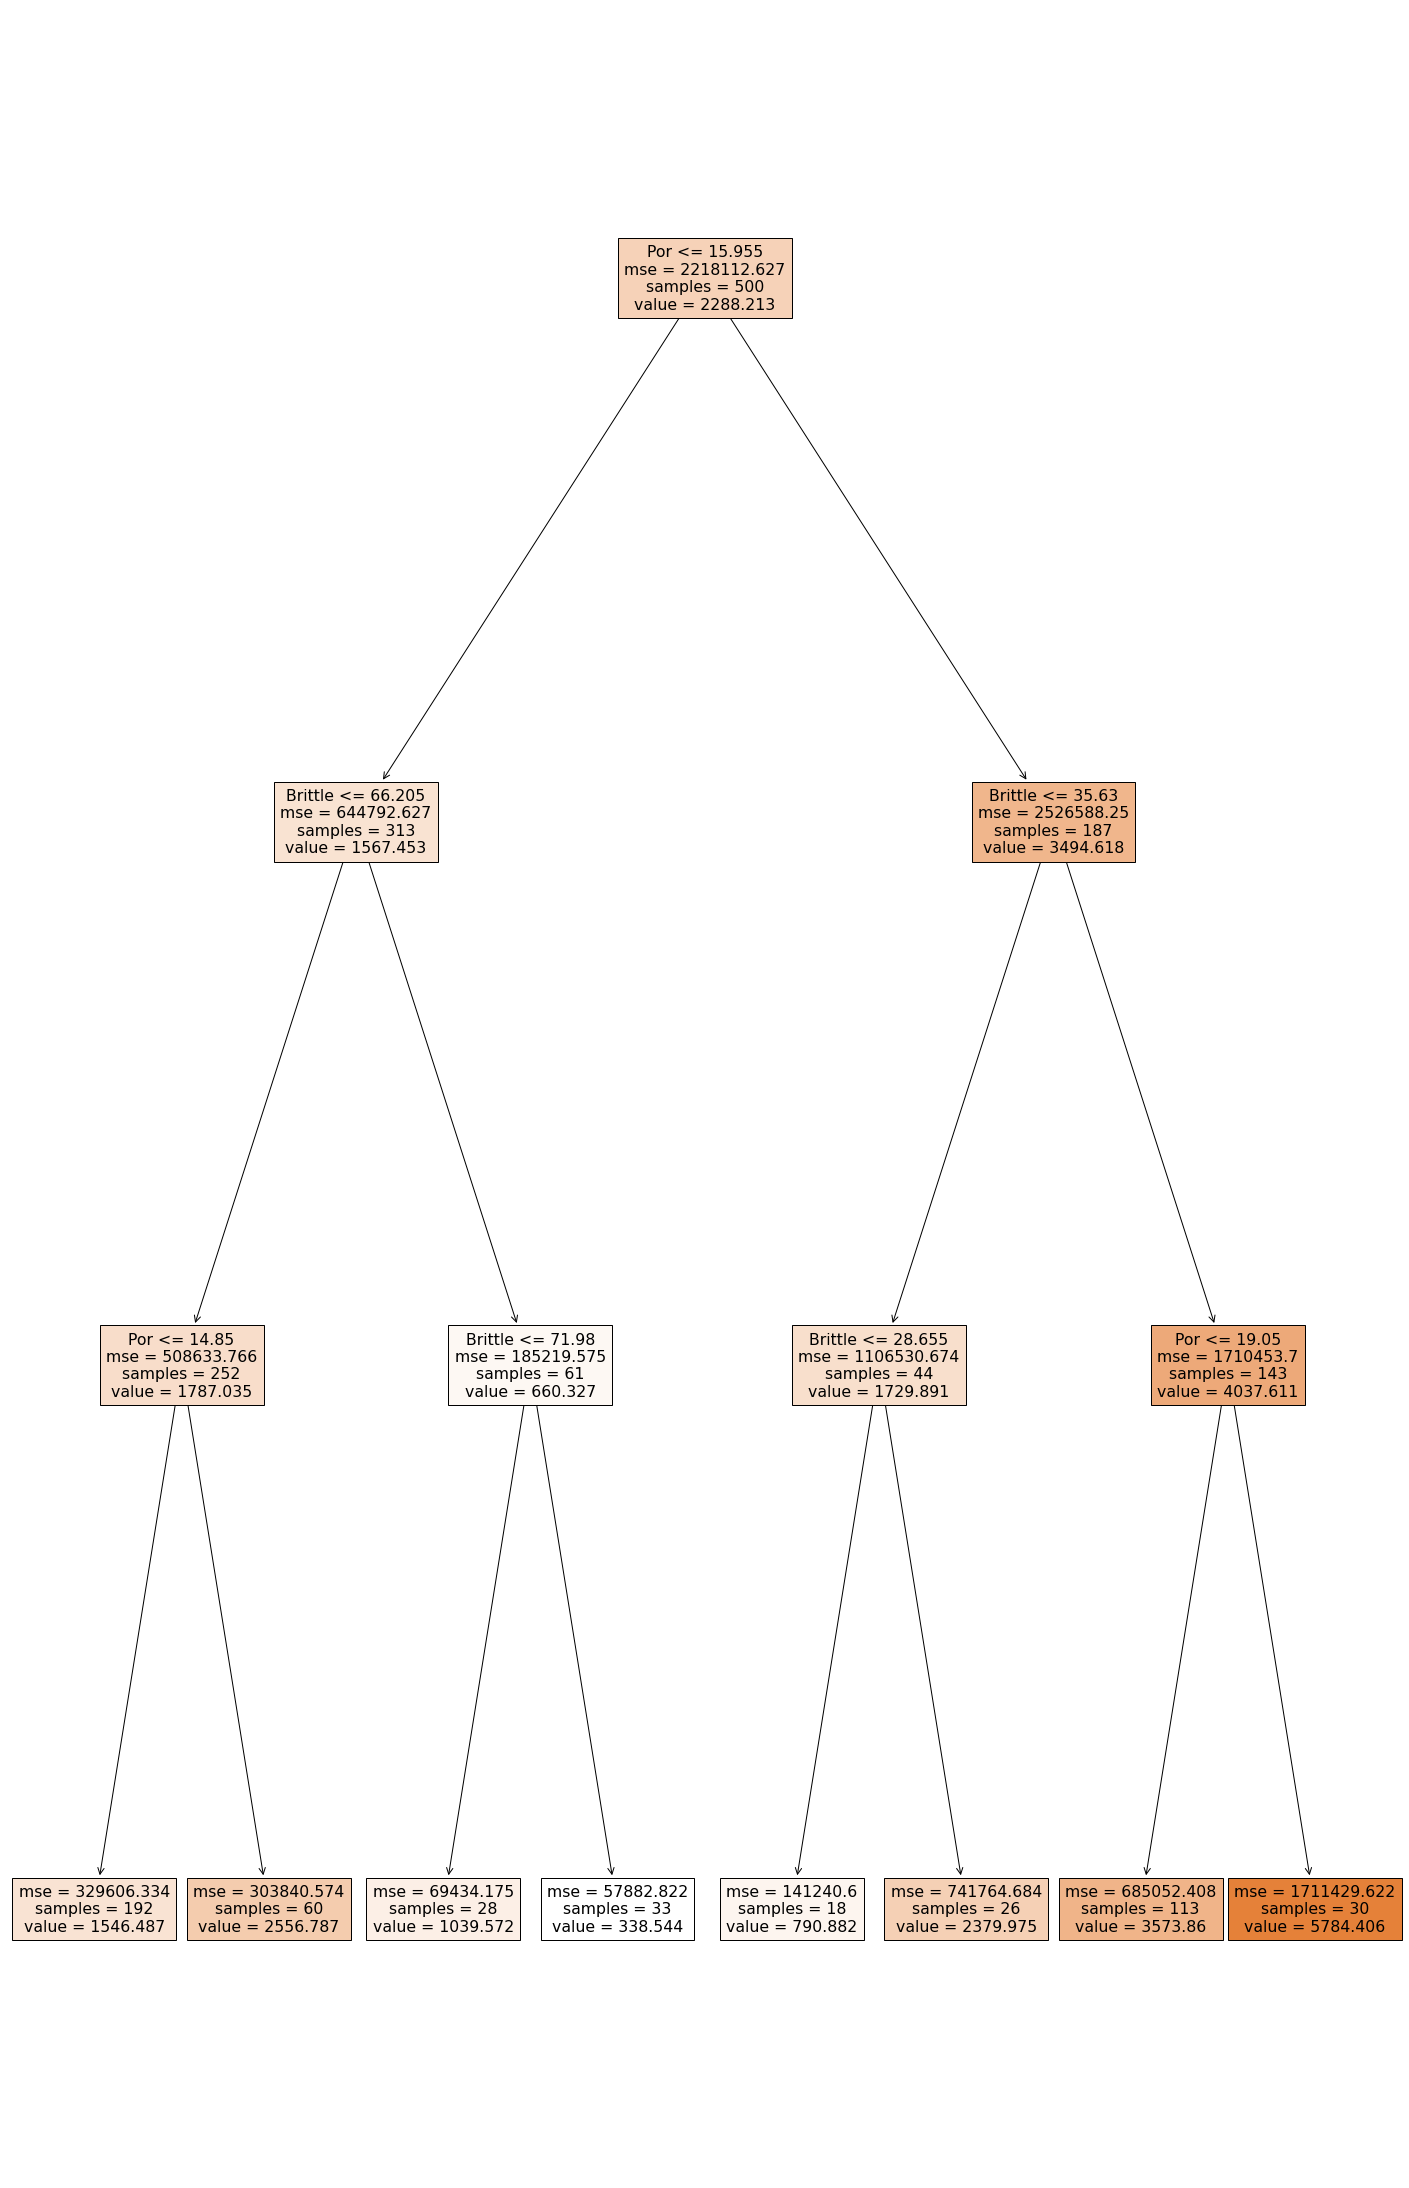

In [60]:
from sklearn import tree
feature_names=['Por','Brittle']

fig = plt.figure(figsize=(25,40))
_ = tree.plot_tree(regr_5, 
                   feature_names=feature_names,  
                   filled=True)

In [61]:
y_5 = regr_5.predict(X_test)

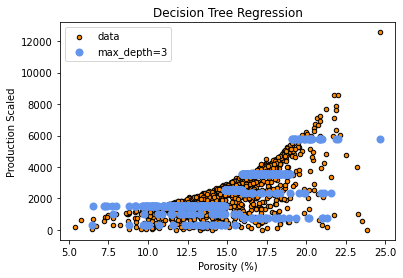

In [62]:
# Plot the results
plt.figure()
plt.scatter(X['Por'], y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(X_test['Por'], y_5, color="cornflowerblue",
         label="max_depth=3", linewidth=2)
plt.xlabel("Porosity (%)")
plt.ylabel("Production Scaled")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [63]:
evaluate(regr_5,X_test,y_test)

r2 = 0.61
MAE = 602.83
Mean Square Error = 800729.41
Squareroot Mean Square Error = 894.83
